In [1]:
import geopandas as gpd

In [2]:
# Import Califrnia Conservation Easement Database shapefile

CCED = gpd.read_file('../../data/CCED1/CCED_California_Conservation_Easement_Database.shp')

In [3]:
# Check the type of dataframe

type(CCED)

geopandas.geodataframe.GeoDataFrame

In [4]:
# Basic look at what kind of things are in the rows and columns

CCED.head()

,ease_label,sitename,esmthldr,eholdtyp,pubaccess,duration,comments,projectid,dtmboardap,county,...,s_emthd1,ShapeSTLen,OBJECTID,e_type,Shape_Leng,OBJECTID_1,Shape_Le_1,GlobalID,OBJECTID_2,geometry
0,Conservation Easement,Forest Service Easement,United States Forest Service,Federal,Closed,Permanent,None,None,None,San Diego,...,None,13904.975825,1,None,11677.376353,1,11677.376353,{47F27121-F8E0-464A-8460-257E4815EC72},1,MULTIPOLYGON Z (((-12986180.651 3863101.889 0....
1,Conservation Easement,Forest Service Easement,United States Forest Service,Federal,Closed,Permanent,None,None,None,San Diego,...,None,4682.317029,2,None,3906.326855,2,3906.326855,{4A76CAED-7EFA-4B3D-B60F-25077C8132F9},2,"POLYGON Z ((-13004703.942 3936729.412 0.000, -..."
2,Conservation Easement,Forest Service Easement,United States Forest Service,Federal,Closed,Permanent,None,None,None,Riverside,...,None,2862.369888,3,None,2381.546995,3,2381.546995,{4C17BE5C-00CE-456F-8CF0-259211A8DBA7},3,"POLYGON Z ((-12985843.064 3982453.578 0.000, -..."
3,Conservation Easement,Forest Service Easement,United States Forest Service,Federal,Closed,Permanent,None,None,None,San Bernardino,...,None,1702.694201,4,None,1406.940351,4,1406.940351,{A48635D1-6A10-419B-B5A2-12F0355E8EC5},4,"POLYGON Z ((-13046839.601 4059743.122 0.000, -..."
4,Conservation Easement,Forest Service Easement,United States Forest Service,Federal,Closed,Permanent,None,None,None,El Dorado,...,None,355.721294,5,None,276.692317,5,276.692317,{52689BFB-BBCA-4E4C-A224-6A334B158035},5,MULTIPOLYGON Z (((-13359781.503 4702478.829 0....


Comments, projectid, and dtmboardap can most likely be eliminated. I wonder if we can also eliminate the ease_label column because it seems to all say Conservation Easement.

In [5]:
CCED.tail()

,ease_label,sitename,esmthldr,eholdtyp,pubaccess,duration,comments,projectid,dtmboardap,county,...,s_emthd1,ShapeSTLen,OBJECTID,e_type,Shape_Leng,OBJECTID_1,Shape_Le_1,GlobalID,OBJECTID_2,geometry
12292,Conservation Easement,Jacobsen Ranches,Sonoma County Agricultural Preservation and Op...,Special District,Closed,Unknown,None,None,None,Sonoma,...,None,3715.891560,0,Agricultural Easement,0.000000,12304,2916.724267,{27E3BEC5-A835-44A2-BAAF-0BFD9F050FF0},12293,"POLYGON Z ((-13656235.926 4611577.013 0.000, -..."
12293,Conservation Easement,Ten Mile River,The Nature Conservancy,NonProfit,Closed,Unknown,None,None,None,Mendocino,...,The Conservation Fund - California,12463.542161,2648,None,9603.545529,12313,9603.545528,{AC235E38-E3D7-4E40-9199-5AF9E1BDE890},12294,"POLYGON Z ((-13774767.297 4800714.734 0.000, -..."
12294,Conservation Easement,TNC Easement,The Nature Conservancy,NonProfit,Closed,Unknown,None,None,None,Mendocino,...,None,25175.877213,2776,None,19392.853222,12314,19392.853222,{B800A504-CCC6-4FE8-9447-52CDB15B8048},12295,"POLYGON Z ((-13772053.708 4806425.419 0.000, -..."
12295,Conservation Easement,Ten Mile River,The Conservation Fund - California,NonProfit,Closed,Unknown,None,None,None,Mendocino,...,None,2796.149142,3528,None,2154.428836,12315,2154.428836,{9F878329-6596-4168-8518-9BA33DE50F31},12296,"POLYGON Z ((-13773137.106 4801162.076 0.000, -..."
12296,Conservation Easement,Ten Mile River,The Conservation Fund - California,NonProfit,Closed,Unknown,None,None,None,Mendocino,...,None,1501.762544,3531,None,1157.857449,12316,1157.857449,{7541C12A-14E0-4CD7-9C44-76D97B925451},12297,"POLYGON Z ((-13773133.215 4800380.824 0.000, -..."


Interesting that entry 12292 shows that it is an agricultural easement in the e_type column. None of the other ones have said that so far, which points to why we need the research on what kind of lands the easements contain.

In [6]:
CCED.sample(10)

,ease_label,sitename,esmthldr,eholdtyp,pubaccess,duration,comments,projectid,dtmboardap,county,...,s_emthd1,ShapeSTLen,OBJECTID,e_type,Shape_Leng,OBJECTID_1,Shape_Le_1,GlobalID,OBJECTID_2,geometry
3301,Conservation Easement,3423 Standish Drive Easement,Mountains Recreation and Conservation Authority,Special District,Closed,Unknown,None,None,None,Los Angeles,...,None,240.531913,3395,None,198.894047,3308,198.894047,{2A48AB73-CE95-4DC2-808C-58ECE2861A1D},3302,"POLYGON Z ((-13191976.170 4046406.115 0.000, -..."
9481,Conservation Easement,Unknown or Unnamed,"Unknown, SanGIS reported",Association,Closed,Unknown,None,None,None,San Diego,...,None,1617.363688,9597,None,1353.089105,9492,1353.089105,{9225FAC8-619E-45B1-B43D-308776005E14},9482,"POLYGON Z ((-13042757.227 3893879.281 0.000, -..."
11214,Conservation Easement,Oakvake Ranch LLC,California Rangeland Trust,NonProfit,Closed,Permanent,None,None,None,Mariposa,...,U.S. Natural Resources Conservation Service,43343.662255,11330,None,34461.203895,11225,34461.203895,{7F18A5D2-736E-43AA-9CB3-8EC9F17BAFE1},11215,MULTIPOLYGON Z (((-13357605.900 4482103.861 0....
448,Conservation Easement,Land Trust for Santa Barbara County Easement,Land Trust for Santa Barbara County,NonProfit,Closed,Unknown,None,None,None,Santa Barbara,...,None,11186.956573,470,None,9190.207811,451,9190.207811,{56E1710B-7D75-4887-B06E-F0528F1EBA70},449,"POLYGON Z ((-13355376.535 4113060.393 0.000, -..."
2673,Conservation Easement,TNC Easement,The Nature Conservancy,NonProfit,Closed,Unknown,None,None,None,Mendocino,...,None,6139.512762,2763,None,4714.892327,2677,4714.892327,{0BA965AD-2AB6-4B79-9A2C-39448DE41D1F},2674,"POLYGON Z ((-13761309.087 4829992.568 0.000, -..."
4137,Conservation Easement,Sabre Springs,"San Diego - Parks and Recreation Department, C...",City,Closed,Unknown,None,None,None,San Diego,...,None,1250.117920,4252,None,1045.401614,4148,1045.401614,{D4ACF697-8873-4BA4-891D-543ABBB75545},4138,"POLYGON Z ((-13031877.577 3886693.340 0.000, -..."
6962,Conservation Easement,Unknown or Unnamed,"Unknown, SanGIS reported",Unknown,Closed,Unknown,None,None,None,San Diego,...,None,1300.847204,7077,None,1087.570284,6973,1087.570284,{5664CE5B-AD35-4A30-821A-F83497634841},6963,"POLYGON Z ((-13054169.890 3910703.808 0.000, -..."
111,Conservation Easement,Outlet Creek Ranch (PFT),Pacific Forest Trust,NonProfit,Closed,Unknown,None,None,None,Mendocino,...,None,14465.389465,130,None,11150.200758,114,11150.200758,{410E9FB3-7A05-4C3A-9F1A-B589A0A20574},112,MULTIPOLYGON Z (((-13739113.128 4799801.410 0....
1521,Conservation Easement,Vintage Creek Conservation Easement,California Department of Fish and Wildlife,State,Closed,Unknown,None,None,None,San Diego,...,None,1514.917897,1547,None,1266.482633,1524,1266.482633,{E389B428-D110-4466-A21B-F8CDFD184FD0},1522,MULTIPOLYGON Z (((-13031139.727 3916307.230 0....
12146,Conservation Easement,Northern Drainage Conservation Area,Center for Natural Lands Management,NonProfit,Closed,Unknown,digitized from CNLM monitoring map,None,None,Alameda,...,None,20913.440607,0,None,0.000000,12157,16524.714329,{E7C50EA8-958D-4238-B7A9-3C4E5EB5D248},12147,MULTIPOLYGON Z (((-13551786.365 4545022.446 0....


Some of the entries have unknown as who the easementholder is and the easementholder type. Duration for all of these is also unknown, perhaps the ones that are known to be "permanent" are in the minority. 

In [7]:
# What kinds of data types are in the columns

CCED.dtypes

ease_label      object
sitename        object
esmthldr        object
eholdtyp        object
pubaccess       object
duration        object
comments        object
projectid       object
dtmboardap      object
county          object
src_align       object
src_attr        object
cced_id          int64
gis_acres      float64
year_est         int64
term             int64
dataentry       object
nced_uid        object
s_emthd1        object
ShapeSTLen     float64
OBJECTID         int64
e_type          object
Shape_Leng     float64
OBJECTID_1       int64
Shape_Le_1     float64
GlobalID        object
OBJECTID_2       int64
geometry      geometry
dtype: object

The majority of the data are object. There are some int64 and float64 (more int64).

In [8]:
# look at the column names and if any have a lot of null values
CCED.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12297 entries, 0 to 12296
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ease_label  12297 non-null  object  
 1   sitename    12297 non-null  object  
 2   esmthldr    12297 non-null  object  
 3   eholdtyp    12297 non-null  object  
 4   pubaccess   12297 non-null  object  
 5   duration    12274 non-null  object  
 6   comments    1201 non-null   object  
 7   projectid   120 non-null    object  
 8   dtmboardap  201 non-null    object  
 9   county      12297 non-null  object  
 10  src_align   12297 non-null  object  
 11  src_attr    12235 non-null  object  
 12  cced_id     12297 non-null  int64   
 13  gis_acres   12297 non-null  float64 
 14  year_est    12297 non-null  int64   
 15  term        12297 non-null  int64   
 16  dataentry   2792 non-null   object  
 17  nced_uid    11319 non-null  object  
 18  s_emthd1    100 non-null    object  
 

The columns comments, project id, dtmboardap, dataentry, nced_uid, s_emthd1, and e_type have a lot of missing values. Duration and src_attr have some missing data. The rest are complete.

In [9]:
# how many rows and columns?
CCED.shape

(12297, 28)

In [10]:
# what are the columns looking at

CCED.columns.to_list()

['ease_label',
 'sitename',
 'esmthldr',
 'eholdtyp',
 'pubaccess',
 'duration',
 'comments',
 'projectid',
 'dtmboardap',
 'county',
 'src_align',
 'src_attr',
 'cced_id',
 'gis_acres',
 'year_est',
 'term',
 'dataentry',
 'nced_uid',
 's_emthd1',
 'ShapeSTLen',
 'OBJECTID',
 'e_type',
 'Shape_Leng',
 'OBJECTID_1',
 'Shape_Le_1',
 'GlobalID',
 'OBJECTID_2',
 'geometry']

In [11]:
# What are some of the easementholders? Is the data actually filled in with the unique entity? 

CCED['esmthldr'].sample(10)

203                              Land Trust of Napa County
5852                              Unknown, SanGIS reported
11553                   San Benito Agricultural Land Trust
10107                             Unknown, SanGIS reported
6358                              Unknown, SanGIS reported
11250                                    Placer Land Trust
5964                              Unknown, SanGIS reported
1412     Contra Costa - Dept. of Conservation & Develop...
10824                             Unknown, SanGIS reported
1333                                      Oakland, City of
Name: esmthldr, dtype: object

Unknown, SanGIS reported looks like it will be a problem.

In [12]:
# what agencies/orgs have the most easements?

CCED['esmthldr'].value_counts()

Unknown, SanGIS reported                                5523
Unknown, SANDAG reported                                 830
United States Fish and Wildlife Service                  410
Truckee Donner Land Trust                                390
San Diego - Parks and Recreation Department, City of     361
                                                        ... 
Alga Hills Homeowners Association                          1
Golden Gate National Recreation Area                       1
Telescope Point Homeowners Association                     1
Sonoma County Regional Parks Dept., County of              1
University of California San Diego                         1
Name: esmthldr, Length: 230, dtype: int64

It looks like there will be a ton of individual entries for esmthldr. San Diego's data will be a problem, it looks like they make up the largest number of easements but do not have the actual easementholder listed. Would be more helpful to use eholdtyp because they will be agglomerated a little bit (hopefully)

In [13]:
# Look at easement holder type category

CCED['eholdtyp']

0                 Federal
1                 Federal
2                 Federal
3                 Federal
4                 Federal
               ...       
12292    Special District
12293           NonProfit
12294           NonProfit
12295           NonProfit
12296           NonProfit
Name: eholdtyp, Length: 12297, dtype: object

In [14]:
# How many in each category?

CCED['eholdtyp'].value_counts()

Unknown             2617
NonProfit           2543
Private             2425
Association         1492
Federal              835
Special District     667
State                634
City                 580
County               419
Government            73
JPA                   12
Name: eholdtyp, dtype: int64

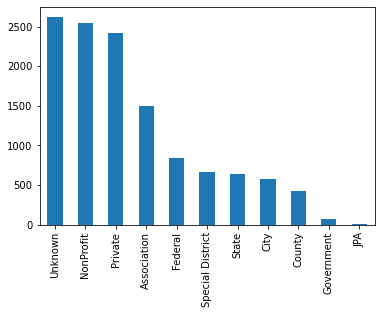

In [15]:
# make into a bar chart

CCED['eholdtyp'].value_counts().plot.bar()

Make a trimmed dataframe for easier viewing right now. for actual analysis of course will keep in the geometry

In [16]:
CCED_trimmed = CCED[['esmthldr','eholdtyp','county','e_type','gis_acres']]
CCED_trimmed

,esmthldr,eholdtyp,county,e_type,gis_acres
0,United States Forest Service,Federal,San Diego,None,479.275130
1,United States Forest Service,Federal,San Diego,None,212.572028
2,United States Forest Service,Federal,Riverside,None,78.358309
3,United States Forest Service,Federal,San Bernardino,None,23.335541
4,United States Forest Service,Federal,El Dorado,None,0.524050
...,...,...,...,...,...
12292,Sonoma County Agricultural Preservation and Op...,Special District,Sonoma,Agricultural Easement,125.251993
12293,The Nature Conservancy,NonProfit,Mendocino,None,856.231628
12294,The Nature Conservancy,NonProfit,Mendocino,None,2448.907514
12295,The Conservation Fund - California,NonProfit,Mendocino,None,20.603200


In [17]:
# Investigate the Unknown eholdtyp
CCED_trimmed.query("eholdtyp == 'Unknown'")

,esmthldr,eholdtyp,county,e_type,gis_acres
992,Unknown,Unknown,Riverside,None,25.302417
993,Unknown,Unknown,Riverside,None,10.353036
994,Unknown,Unknown,Riverside,None,394.683635
2155,Unknown,Unknown,El Dorado,None,527.056328
2176,Unknown,Unknown,Riverside,None,17.969755
...,...,...,...,...,...
11249,Unknown,Unknown,Calaveras,None,150.861703
11541,Agricultural-Natural Resources Trust (ANRT),Unknown,Contra Costa,None,1411.431414
12136,Unknown,Unknown,Mendocino,None,2447.508208
12143,Unknown,Unknown,Alameda,Unknown,155.780270


In [18]:
# Investigate the Association eholdtyp

CCED_trimmed.query("eholdtyp == 'Association'")

,esmthldr,eholdtyp,county,e_type,gis_acres
4541,4-S Ranch Masters Association,Association,San Diego,None,1.949063
4604,Aviara Master Association,Association,San Diego,None,4.006907
4606,Calavera Hills Master Association,Association,San Diego,None,3.866428
4607,Palomar Oaks Business Center Association,Association,San Diego,None,0.246389
4609,Marbrisa Homeowners Association,Association,San Diego,None,0.833496
...,...,...,...,...,...
11123,"Unknown, SanGIS reported",Association,San Diego,None,0.011957
11124,"Unknown, SanGIS reported",Association,San Diego,None,0.012998
11125,"Unknown, SanGIS reported",Association,San Diego,None,0.012290
11126,"Unknown, SanGIS reported",Association,San Diego,None,0.034130


In [19]:
# Investigate the Government eholdtyp. Would I be able to mannually sort them into the right kind of govt?

CCED_trimmed.query("eholdtyp == 'Government'").sample(20)

,esmthldr,eholdtyp,county,e_type,gis_acres
9341,"Unknown, SanGIS reported",Government,San Diego,None,18.555356
9693,"Unknown, SanGIS reported",Government,San Diego,None,11.567655
6289,"Unknown, SanGIS reported",Government,San Diego,None,0.160086
11358,Fallbrook Land Conservancy,Government,San Diego,None,2.692668
9831,"Unknown, SanGIS reported",Government,San Diego,None,5.441498
9384,"Unknown, SanGIS reported",Government,San Diego,None,48.988513
9569,"Unknown, SanGIS reported",Government,San Diego,None,6.191546
9494,"Unknown, SanGIS reported",Government,San Diego,None,17.778165
7323,"Unknown, SanGIS reported",Government,San Diego,None,9.110889
6430,"Unknown, SanGIS reported",Government,San Diego,None,1.687834


Doesn't look like I'd be able to sort the general "government" ones into the more specific categories like Federal, State, local. Almost none of them actually have who the easementholder is. Fallbrook Land Conservancy is actually a non-profit, so that is actually incorrectly classified as government anyway. 

Curious about the Nature Conservancy's easements

In [20]:
CCED_trimmed.query("esmthldr == 'The Nature Conservancy'")

,esmthldr,eholdtyp,county,e_type,gis_acres
2166,The Nature Conservancy,NonProfit,Merced,None,1804.406281
2167,The Nature Conservancy,NonProfit,Merced,None,309.875914
2526,The Nature Conservancy,NonProfit,Butte,None,2980.276907
2527,The Nature Conservancy,NonProfit,San Diego,None,177.495210
2528,The Nature Conservancy,NonProfit,Merced,None,5819.057485
...,...,...,...,...,...
2688,The Nature Conservancy,NonProfit,Ventura,None,194.784946
2689,The Nature Conservancy,NonProfit,Ventura,None,39.890315
4243,The Nature Conservancy,NonProfit,San Diego,None,37.067076
12293,The Nature Conservancy,NonProfit,Mendocino,None,856.231628


Curious about by county

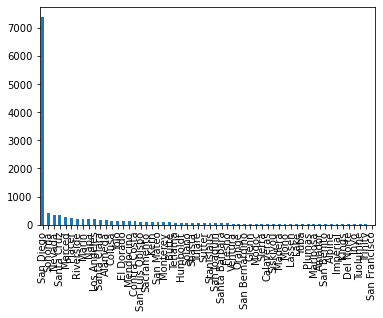

In [21]:
CCED_trimmed['county'].value_counts().plot.bar()

In [22]:
CCED_trimmed.query("county == 'San Diego'").sample(20)

,esmthldr,eholdtyp,county,e_type,gis_acres
10504,"Unknown, SanGIS reported",Private,San Diego,None,0.041984
10088,"Unknown, SanGIS reported",Unknown,San Diego,None,6.921814
7571,"Unknown, SanGIS reported",Association,San Diego,None,0.013654
7999,"Unknown, SanGIS reported",Unknown,San Diego,None,0.118977
7337,"Unknown, SanGIS reported",Unknown,San Diego,None,4.124092
4121,"San Diego - Parks and Recreation Department, C...",City,San Diego,None,1.155548
5777,"Unknown, SanGIS reported",Association,San Diego,None,1.335867
6787,"Unknown, SanGIS reported",Unknown,San Diego,None,2.744550
8305,"Unknown, SanGIS reported",Unknown,San Diego,None,13.879764
6316,"Unknown, SanGIS reported",Unknown,San Diego,None,0.008431


It looks like the data from San Diego has a mix of some that are correctly inputted with complete information, while others were just imported from SanGIS and SANDAG where the easementholders were not differentiated. 
Do other counties have this problem? Let me check a different county.

In [23]:
CCED_trimmed.query("county == 'San Joaquin'").sample(20)

,esmthldr,eholdtyp,county,e_type,gis_acres
12190,NRCS,Federal,San Joaquin,None,653.018497
1484,California Department of Fish and Wildlife,State,San Joaquin,None,26.182689
983,California Farmland Trust,NonProfit,San Joaquin,None,174.187714
984,California Farmland Trust,NonProfit,San Joaquin,None,206.636303
2637,The Nature Conservancy,NonProfit,San Joaquin,None,2908.480958
1457,California Department of Fish and Wildlife,State,San Joaquin,None,5.941512
2224,United States Natural Resources Conservation S...,Federal,San Joaquin,None,165.811927
12011,California Rangeland Trust,NonProfit,San Joaquin,None,2247.092964
2234,United States Natural Resources Conservation S...,Federal,San Joaquin,None,199.950290
11338,Delta Protection Commission,State,San Joaquin,None,18.344408


San Joaquin data looks like it was all filled in with information for the individual easements. After all this perhaps I need to exclude San Diego because its data seems off. 

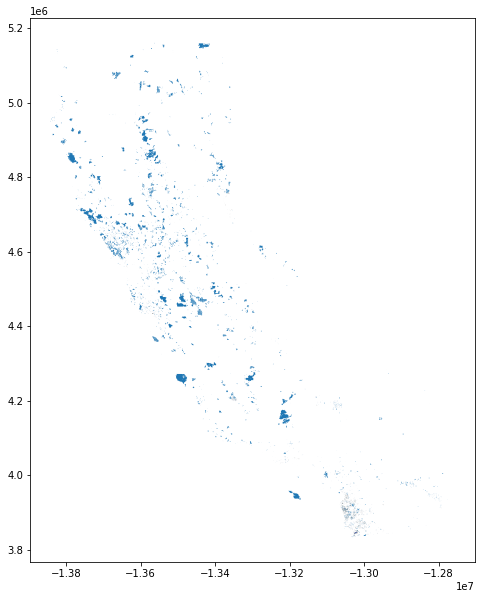

In [24]:
# do a basic plot of the easements with the geometry

CCED.plot(figsize=(12,10))